In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/car-pdediction-data/car_prediction_dataCode (2)/car_prediction_data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
#null  values 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

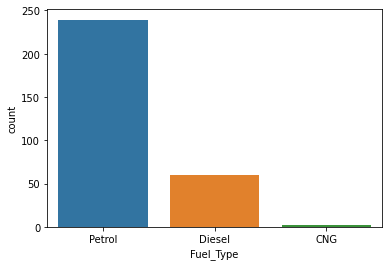

In [6]:
print(data['Fuel_Type'].value_counts())
sns.countplot(data['Fuel_Type'])

Manual       261
Automatic     40
Name: Transmission, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'types of transmission')

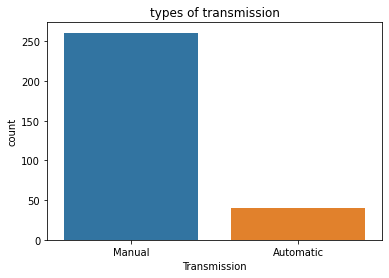

In [7]:
print(data['Transmission'].value_counts())
sns.countplot(data['Transmission'])
plt.title("types of transmission")

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'car model names')

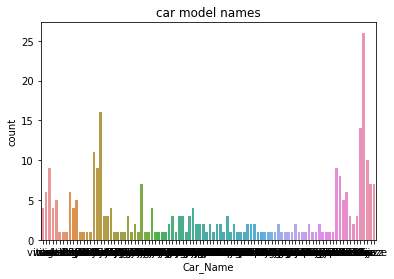

In [8]:
print(data['Car_Name'].value_counts())
sns.countplot(data['Car_Name'])
plt.title("car model names")

In [9]:
#we have a large number of car names here so if we wish to drop that column,its upto u because i dont think so it is going to have that much impact
data.drop(['Car_Name'], axis=1,inplace =True)

In [10]:
data["current_year"] = 2022
#data.head()

In [11]:
#check difference between current year and car model year
data['year_difference'] = data["current_year"] - data["Year"]
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,year_difference
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [12]:
data['price_difference'] = data['Present_Price'] - data['Selling_Price']
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,year_difference,price_difference
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8,2.24
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9,4.79
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5,2.60
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11,1.30
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8,2.27


In [13]:
#dealing with categorical dataset
data =pd.get_dummies(data, drop_first =True)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,year_difference,price_difference,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,2022,8,2.24,0,1,0,1
1,2013,4.75,9.54,43000,0,2022,9,4.79,1,0,0,1
2,2017,7.25,9.85,6900,0,2022,5,2.60,0,1,0,1
3,2011,2.85,4.15,5200,0,2022,11,1.30,0,1,0,1
4,2014,4.60,6.87,42450,0,2022,8,2.27,1,0,0,1


In [14]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,year_difference,price_difference,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,NaN,-1.000000,-0.333746,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.520881,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.864902,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.333832,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,0.107415,-0.053469,0.055687,0.124269,-0.050316
current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_difference,-1.000000,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,0.333746,-0.064315,0.059959,0.039896,-0.000394
price_difference,-0.333746,0.520881,0.864902,0.333832,0.107415,NaN,0.333746,1.000000,0.265881,-0.263835,-0.336902,-0.237802
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,0.265881,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.263835,-0.979648,1.000000,0.358321,0.091013


In [15]:
#sns.pairplot(data)

In [16]:
#sns.heatmap(data)

In [17]:
#dividing data into x and y

x= data.iloc[: , 2:]
y= data.iloc[:,1]
print(x.shape)
y.head()

(301, 10)


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
y_test.head()

257    8.50
217    3.15
13     6.10
36     4.65
184    0.25
Name: Selling_Price, dtype: float64

**now applying regressor models **

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model1 = ExtraTreesRegressor()
model1.fit(x_train,y_train)
score = model1.score(x_test,y_test)
print('score', score)
predict = model1.predict(x_test)

predict

score 0.9353905125704989


array([ 8.4265,  3.0625,  5.906 ,  4.536 ,  0.2109,  4.5   ,  2.668 ,
        0.9572,  8.0308,  9.6795,  4.1265,  1.2071,  2.648 ,  3.1465,
       15.6093, 10.7575,  0.4704,  0.5209,  0.6085,  3.7875,  6.5445,
        3.483 ,  1.2635,  5.1959,  5.323 ,  5.9005,  9.5022,  0.4245,
        5.8273,  5.3505,  0.5874,  5.1075,  4.502 ,  7.331 ,  0.5753,
        9.004 ,  1.1105,  4.477 , 23.    ,  0.4709,  4.873 ,  7.6399,
        0.382 ,  0.1372,  0.7856,  4.4965,  0.6571,  2.704 ,  0.3766,
        2.8835,  2.756 ,  0.4046, 22.8024,  5.4373,  2.6525,  0.7113,
        5.991 ,  2.2095,  0.4629,  2.214 ,  0.4701])

In [20]:
#feature importance 
feature_importance = model1.feature_importances_
print(feature_importance)

[4.48861439e-01 2.18037594e-02 1.82368273e-04 0.00000000e+00
 6.88669742e-02 7.27023191e-02 5.15026313e-02 3.49562732e-02
 2.60841017e-01 4.02832181e-02]


<AxesSubplot:>

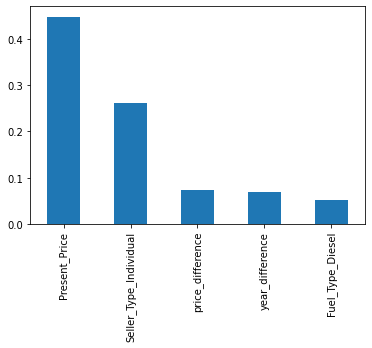

In [21]:
feat_importance= pd.Series(feature_importance , index = x_train.columns)
feat_importance.nlargest(5).plot(kind='bar')

In [22]:
###### random forest regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
model2 =RandomForestRegressor()
model2.fit(x_train,y_train)
score = model2.score(x_test,y_test)
print(score)
predict = model2.predict(x_test)
predict

0.9227766919677599


array([ 8.3975,  3.0405,  5.7955,  4.576 ,  0.1971,  4.7789,  1.7495,
        1.015 ,  8.1056,  9.999 ,  4.381 ,  1.1659,  2.9145,  3.218 ,
       16.926 , 10.7817,  0.4774,  0.4934,  0.4709,  3.9045,  6.6165,
        3.1775,  1.1924,  4.9692,  6.16  ,  5.5805,  8.8703,  0.3704,
        4.366 ,  5.3875,  0.5236,  7.8735,  4.1675,  6.9615,  0.5906,
        8.783 ,  1.1054,  3.9495, 22.351 ,  0.4757,  4.98  ,  7.2319,
        0.355 ,  0.1383,  0.7803,  4.544 ,  0.7533,  2.9435,  0.2986,
        2.2251,  2.715 ,  0.3937, 22.0268,  5.1215,  2.71  ,  0.7123,
        5.7293,  2.554 ,  0.4267,  2.6115,  0.4628])

In [24]:
#validation
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto' , 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split =[2,5,10,15,100]
min_samples_leaf =[1,2,5,10]

In [25]:
random_grid = {'n_estimators' : n_estimators , 
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split, 
              'min_samples_leaf' : min_samples_leaf }
rscv = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, scoring = 'neg_mean_squared_error' , n_iter =10,cv=5, verbose =2, random_state =42,n_jobs =1)
rscv.fit(x_train,y_train)
print(random_grid)
rscv.fit(x_train,y_train)
rscv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [26]:
print(rscv.best_score_)
print(rscv.best_params_)

-2.896171962022272
{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


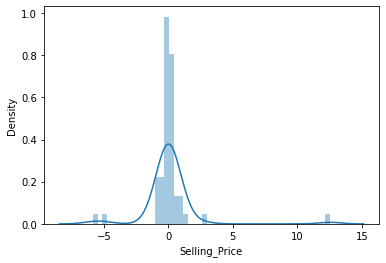

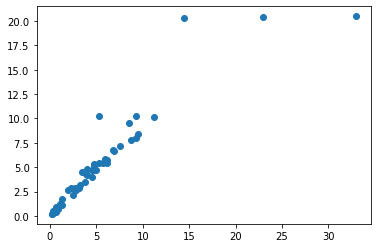

In [27]:
predict = rscv.predict(x_test)
sns.distplot(y_test-predict)
plt.show()
plt.scatter(y_test,predict)
plt.show()

In [28]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predict))
print('MSE',metrics.mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE 0.7355256227876962
MSE 3.8628989561278755
RMSE 1.9654258968803366


xgboost regressor

In [29]:
#xgboost classifier 
import xgboost as xgb
from scipy.stats import uniform, randint
model3 = xgb.XGBRegressor(objective = 'reg:linear',random_state =42)

params = {"gamma": uniform(0,0.5), 
         'learning_rate': uniform(0.03,0.3),
         'max_depth': randint(2,6),
         'n_estimators' : randint(100,150),
         "subsample": uniform(0.6,0.4)
         }

In [30]:
rscv2 = RandomizedSearchCV(estimator = model3, param_distributions = params, scoring = 'neg_mean_squared_error' , n_iter =10,cv=5, verbose =2, random_state =42,n_jobs =1)

In [31]:
rscv2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[10:11:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.4s
[10:11:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[10:11:07] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[10:11:08] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamm

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen obje

In [32]:
print(rscv2.best_score_)

-2.683464579835261


In [33]:
rscv2.best_params_

{'gamma': 0.19993048585762774,
 'learning_rate': 0.04399969896408463,
 'max_depth': 5,
 'n_estimators': 115,
 'subsample': 0.6931085361721216}

In [34]:
predict = rscv2.predict(x_test)
score = rscv2.score(x_test,y_test)
score

-2.028144627415765

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


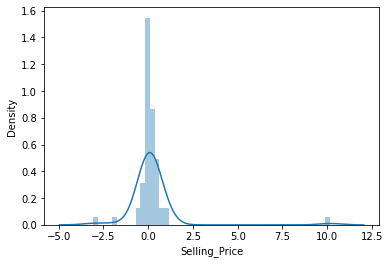

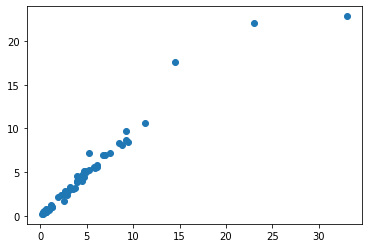

In [35]:
sns.distplot(y_test-predict)
plt.show()
plt.scatter(y_test,predict)
plt.show()

In [36]:
print('MAE',metrics.mean_absolute_error(y_test,predict))
print('MSE',metrics.mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE 0.48764466542689516
MSE 2.028144627415765
RMSE 1.4241294279017498


**catboost regressor**

In [37]:
import catboost as cat

model4 = cat.CatBoostRegressor()

params = { 
        'learning_rate': [0.03,0.1],
         'depth': [4,6,10],
         'l2_leaf_reg': [1,3,5,7]
       }

In [38]:
rscv3 = RandomizedSearchCV(estimator = model4, param_distributions = params, scoring = 'neg_mean_squared_error' , n_iter = 4,cv=4, verbose =2, random_state =42,n_jobs =1)

In [39]:
!pip install catboost

In [40]:
rscv3.fit(x_train,y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
0:	learn: 4.4645199	total: 56.2ms	remaining: 56.2s
1:	learn: 4.3828024	total: 57.1ms	remaining: 28.5s
2:	learn: 4.2896557	total: 57.8ms	remaining: 19.2s
3:	learn: 4.2245064	total: 58.5ms	remaining: 14.6s
4:	learn: 4.1336293	total: 59ms	remaining: 11.7s
5:	learn: 4.0584421	total: 59.6ms	remaining: 9.87s
6:	learn: 3.9788858	total: 60.2ms	remaining: 8.54s
7:	learn: 3.9062361	total: 60.8ms	remaining: 7.54s
8:	learn: 3.8329702	total: 61.6ms	remaining: 6.78s
9:	learn: 3.7578747	total: 62.3ms	remaining: 6.16s
10:	learn: 3.6867770	total: 62.9ms	remaining: 5.65s
11:	learn: 3.6269665	total: 63.5ms	remaining: 5.22s
12:	learn: 3.5597888	total: 64.2ms	remaining: 4.88s
13:	learn: 3.4933421	total: 64.9ms	remaining: 4.57s
14:	learn: 3.4300129	total: 65.5ms	remaining: 4.3s
15:	learn: 3.3686244	total: 66.2ms	remaining: 4.07s
16:	learn: 3.3023053	total: 66.8ms	remaining: 3.86s
17:	learn: 3.2462318	total: 67.6ms	remaining: 3.69s
18:	learn: 3.1927

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f5953ce92d0>,
                   n_iter=4, n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rscv3.best_params_

{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'depth': 4}

In [42]:
rscv.best_score_

-2.896171962022272

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


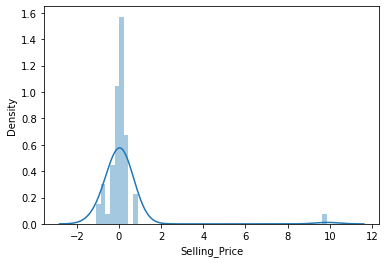

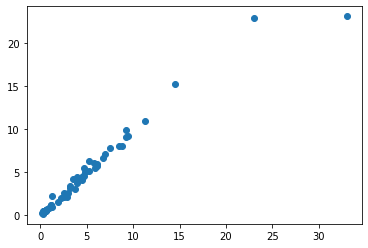

In [43]:
predict = rscv3.predict(x_test)
sns.distplot(y_test-predict)
plt.show()
plt.scatter(y_test,predict)
plt.show()

In [44]:
print('MAE',metrics.mean_absolute_error(y_test,predict))
print('MSE',metrics.mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE 0.42819884999676083
MSE 1.736691012548089
RMSE 1.3178357304869561
